<a href="https://colab.research.google.com/github/jiw0n-lee/ESAA/blob/main/YB0321(1)_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [4]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

Text(0, 0.5, 'Total Quantity Ordered')

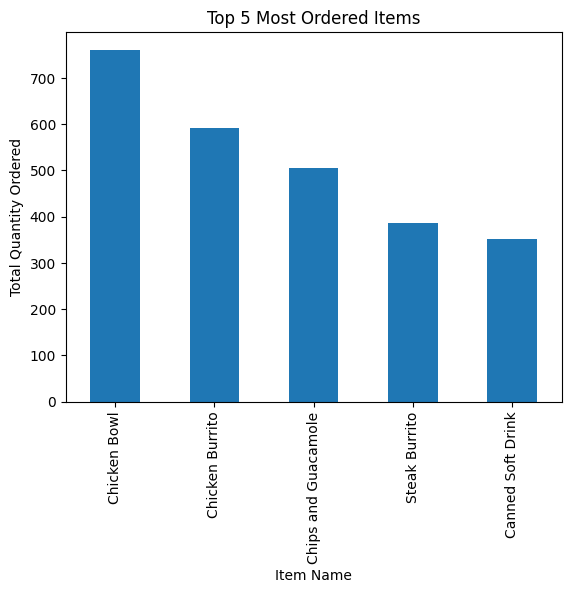

In [7]:
top5_items = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)
top5_items.plot(kind='bar')
plt.title('Top 5 Most Ordered Items')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Ordered')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

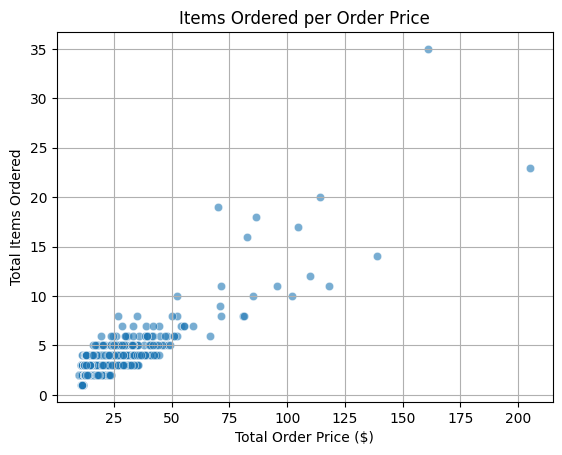

In [14]:
import seaborn as sns

chipo['item_price'] = chipo['item_price'].replace('[\$,]','', regex=True).astype(float)

order_summary = chipo.groupby('order_id').agg({
    'item_price': 'sum',
    'quantity': 'sum'
}).reset_index()

sns.scatterplot(data=order_summary, x='item_price', y='quantity', alpha=0.6)
plt.title('Items Ordered per Order Price')
plt.xlabel('Total Order Price ($)')
plt.ylabel('Total Items Ordered')
plt.grid(True)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.



<ipython-input-16-3c2b8318df63>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  item_revenue = chipo.groupby('item_name').apply(lambda x: (x['item_price'] * x['quantity']).sum())


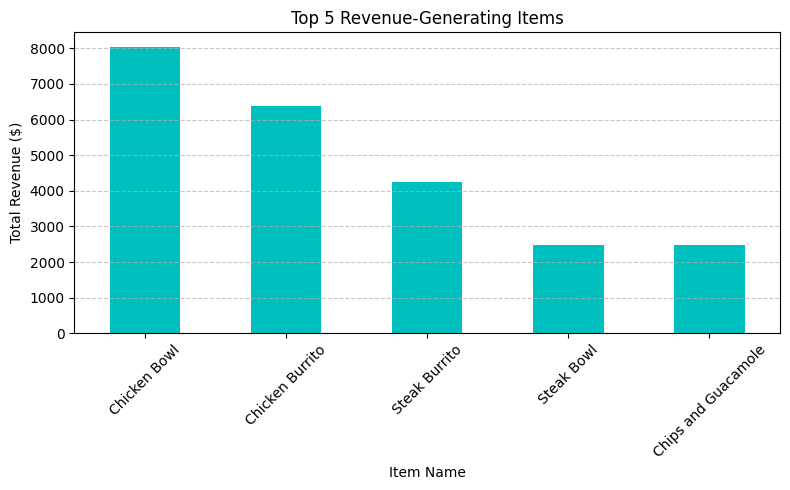

In [16]:
# Q : 어떤 메뉴가 가장 많은 매출을 올렸을까?

# 메뉴별 총 매출 계산
item_revenue = chipo.groupby('item_name').apply(lambda x: (x['item_price'] * x['quantity']).sum())

# 매출이 높은 상위 5개 아이템 선택
top5_revenue_items = item_revenue.sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top5_revenue_items.plot(kind='bar', color='c')
plt.title('Top 5 Revenue-Generating Items')
plt.xlabel('Item Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
